#Sarcasm Detection (Classification)

- We have two categories - sarcastic and non-sarcastic. It is a binary classifiation problem.
- Keras works only on tensorflow version 2.x and above. So, always check the version of tensorflow.

# Important things to note:
- Tokenizer is not case sensitive, it converts everything into lowercase.
- The word index give ranking or priority based on frequency of words in the corpus and then the sequence or the position of the word in the frequency index.
- The num_words parameter trims the word index to the top 'n' words.
- Word index starts as 1 becasue 0s are reserved for padding.
- Padding and truncating is done as models require sequences of same length.
- In case accuracy is lagging, you can adjust length of sequence by padding or truncating and train again.
- By default padding is pre and max_length is equal to the length of the longest sentences if not specified.
- The training and testing data both should be in same input format for the modeling.
- The labels are simple arrays and need to be converted to numpy arrays for easy matrix multiplication during the processing (have all elements of same data type).
- The sequential API specifies that output of one layer is input for another layer.
- Embedding layer creates an embedding matrix of size vocab_size * embedding_dimension which contains a representation for every word of dimensions equal to 'embedding_dimension'. Every word is a vector or 1 x embedding dimension. Intially, it has the word index representation for every word but as the model trains, the embedding matrix is refined and for each word, a better representation is obtained. For every sentence of length 'n' the final vector is a maxtrix of n x embedding_dimention.
- Global average pooling 1D averages all the elements column wise and reduces the matrix to 1 * embedding_dimension
- The activation functions in dense layers have to be added to include non-linearity and complexity to the model. RelU function - f(x): max(0,x)

#

In [72]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [73]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load Dataset

In [74]:
# Get dataset from Google API
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2024-08-23 11:46:28--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.207, 172.217.214.207, 142.251.184.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2024-08-23 11:46:28 (201 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [75]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

In [76]:
datastore

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [77]:
# Store the data in a list
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [78]:
# Check samples
print(sentences[0])
print(labels[0])

print(sentences[1])
print(labels[1])

former versace store clerk sues over secret 'black code' for minority shoppers
0
the 'roseanne' revival catches up to our thorny political mood, for better and worse
0


In [79]:
# Check length of lists for consistency
print(len(sentences))
print(len(labels))

26709
26709


In [114]:
# Define parameters for neural network
vocab_size = 10000
max_length = 100
oov_tok = "<OOV>"
#ptrunc_type post means length will be truncated from the end (if no type is selected default is "pre")
trunc_type='post'
#padding_type post means padding 0s will be added in end (if no type is selected default is "pre")
padding_type='post'
training_size = 20000
embedding_dim = 128

In [115]:
#Splitting data into train and test
# Training  Data(To create a model)
# Testing data(To test this model)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

General steps: sentence -> numeric -> padding/truncating ->ML model

In [116]:
# create a tokenizer to split the sentence into words
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

# Print the word index for the given corpus
word_index = tokenizer.word_index

# Create training sequences and pad them
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Create testing sequnces and pad them
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [117]:
# Check shape
training_padded.shape

(20000, 100)

In [118]:
testing_padded.shape

(6709, 100)

In [119]:
# Check the data
print(training_sentences[12])
print(training_padded[12])

north korea praises trump and urges us voters to reject 'dull hillary'
[ 226  477 2843   13    9  922  239  371    2 4265    1 6843    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [120]:
# Converting normal arrays to numpy arrays
# Faciliates easy calculations in the backend
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Build The Neural Network

Creating a sequential model which operates in this way: input -> layer1 -> layer2 -> ,......->Output

In [162]:
import tensorflow as tf
from tensorflow.keras import regularizers

# Define the input
input_layer = tf.keras.layers.Input(shape=(max_length,), name='input_layer')

# Embedding layer
embedding_layer = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, name='embedding_layer')(input_layer)

# LSTM layers
lstm_layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True), name='bidirectional_lstm')(embedding_layer)

# Self-Attention layer
attention_layer = tf.keras.layers.Attention(name='self_attention_layer')([lstm_layer, lstm_layer])

# Global Average Pooling layer
global_avg_pooling = tf.keras.layers.GlobalAveragePooling1D(name='global_average_pooling')(attention_layer)

# Flatten the output
flatten_layer = tf.keras.layers.Flatten(name='flatten_layer')(global_avg_pooling)

# Dense layers with L2 regularization
dense_1 = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='dense_1')(flatten_layer)
dense_2 = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='dense_2')(dense_1)
dense_3 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='dense_3')(dense_2)

# Dropout layer
dropout_layer = tf.keras.layers.Dropout(0.1, name='dropout_layer')(dense_3)

# Output layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name='dense_4')(dropout_layer)

# Define the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='text_classification_model')

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "text_classification_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_layer           │ (None, 100, 128)       │      1,280,000 │ input_layer[0][0]      │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_lstm        │ (None, 100, 256)       │        263,168 │ embedding_layer[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ self_attention_layer      │ (None, 100, 256)       │              0 │ bidirectional_lstm[0]… │
│ (Attention)               │                        │                │ bidirectional_lstm[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling    │ (None, 256)            │              0 │ self_attention_layer[… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_layer (Flatten)   │ (None, 256)            │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │         65,792 │ flatten_layer[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │         32,896 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │          8,256 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_layer (Dropout)   │ (None, 64)             │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 1)              │             65 │ dropout_layer[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,650,177 (6.29 MB)

 Trainable params: 1,650,177 (6.29 MB)

 Non-trainable params: 0 (0.00 B)

Sigmoid actiavtions calculates probabilty of each class and takes modulus of it to get the class - either 0 or 1.

The binary cross entrpy loss is calculated as follows: binary cross entropy
loss=
p(log p)+(1-p)log(1-p) for every category.

- Num of epochs will decide how many times model will see the entire training data to learn from it

- Verbose=0 will show you nothing (silent).
- Verbose=1 will show you an animated progress bar like this: progres_bar [=============]
- verbose=2 will just mention the number of epoch like this: 1/30, 2/30, 3/30

In [163]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard

# Define the Adam optimizer with a custom learning rate
initial_learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

# Define callbacks
callbacks = [
    # Save the best model based on validation loss
    ModelCheckpoint(filepath='best_model.keras', save_best_only=True, monitor='val_accuracy', verbose=1),

    # Reduce learning rate when a metric has stopped improving
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.01, verbose=1),

    # Stop training when a monitored metric has stopped improving
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),

    # TensorBoard for logging
    TensorBoard(log_dir='./logs', histogram_freq=1)
]

# Compile the model with the Adam optimizer and the learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [164]:
num_epochs = 20
history = model.fit(training_padded, training_labels, batch_size = 32, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2, callbacks=callbacks)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.67506, saving model to best_model.keras
625/625 - 253s - 405ms/step - accuracy: 0.6218 - loss: 0.6739 - val_accuracy: 0.6751 - val_loss: 0.5539 - learning_rate: 0.0010
Epoch 2/20

Epoch 2: val_accuracy improved from 0.67506 to 0.85005, saving model to best_model.keras
625/625 - 262s - 419ms/step - accuracy: 0.8426 - loss: 0.3788 - val_accuracy: 0.8501 - val_loss: 0.3597 - learning_rate: 0.0010
Epoch 3/20

Epoch 3: val_accuracy improved from 0.85005 to 0.85974, saving model to best_model.keras
625/625 - 281s - 450ms/step - accuracy: 0.9244 - loss: 0.2161 - val_accuracy: 0.8597 - val_loss: 0.3799 - learning_rate: 0.0010
Epoch 4/20

Epoch 4: val_accuracy did not improve from 0.85974
625/625 - 261s - 417ms/step - accuracy: 0.9624 - loss: 0.1237 - val_accuracy: 0.8533 - val_loss: 0.4602 - learning_rate: 0.0010
Epoch 5/20

Epoch 5: val_accuracy did not improve from 0.85974
625/625 - 245s - 391ms/step - accuracy: 0.9811 - loss: 0.0751 

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

# Plotting Accuracy and Loss Curves

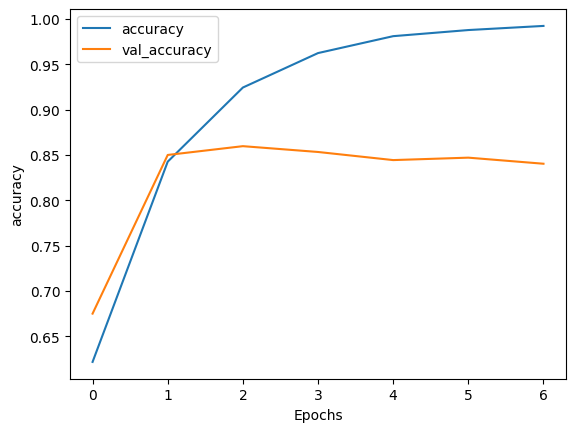

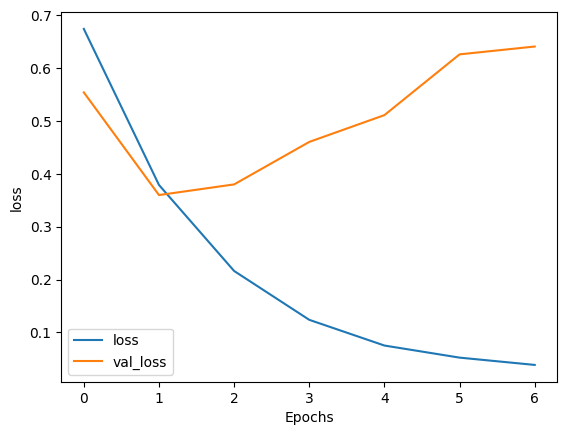

In [165]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#Testing on Unseen Data

In [166]:
sentence = ["I am myself a king of my state",
            "Code was shared in mail or in this chat?",
            "This session was amazing",
            "Data engineering is better then data science",
            "poor man becomes PM",
            "You are bald enough to have a haircut",
            "my friend is going to loose",
            "your posts are becoming too frequent these days"
            ]
#model can only prediict input that is of same pattern as input given in training
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
[[0.03585336]
 [0.2899582 ]
 [0.03629853]
 [0.03566256]
 [0.8487291 ]
 [0.13790269]
 [0.03929442]
 [0.03569541]]
